#Importando nossa biblioteca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amazon = pd.read_excel('/content/drive/MyDrive/AA.xlsx')

In [ ]:
amazon

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


analizando as primeiras celulas do nosso dataframe

In [ ]:
amazon.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


analizando as ultimas celulas do nosso dataframe

## Obtendo algumas informações sobre nosso dataset

In [ ]:
amazon.shape

(6454, 5)

In [ ]:
amazon.size

32270

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## checagem de duplicates e valores null

In [ ]:
amazon.drop_duplicates(inplace = True)
amazon.shape

(6422, 5)

Perceb-se que o numero de linhas diminuiu, dessa forma fica claro que algumas linhas do nosso dado eram duplicatas.

In [ ]:
amazon.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

não possui nenhum valor NULO


## Breve analise do nosso dado

In [ ]:
amazon.describe(include = 'all')

<ipython-input-91-7bc4094b93d9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  amazon.describe(include = 'all')


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,520.955257,NaN
std,5.731806,NaN,NaN,1558.671798,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,8.000000,NaN


# Numero total de incendios


In [ ]:
Total_incendio = amazon['number'].sum()
print('O numero total de incendios registrados foi de',Total_incendio, 'casos')

O numero total de incendios registrados foi de 3345574.66 casos


# Soma de casos de incendios por ano

In [ ]:
Soma_incendio_ano = amazon.groupby('year').sum(numeric_only = True).sort_values(by= 'year')
Soma_incendio_ano = Soma_incendio_ano.reset_index()
Soma_incendio_ano

,year,number
0,1998,123881.00
1,1999,132298.30
2,2000,97102.43
3,2001,137068.49
4,2002,218589.22
5,2003,205531.74
6,2004,246854.55
7,2005,222482.30
8,2006,121827.07
9,2007,203670.60


<Axes: xlabel='year', ylabel='number'>

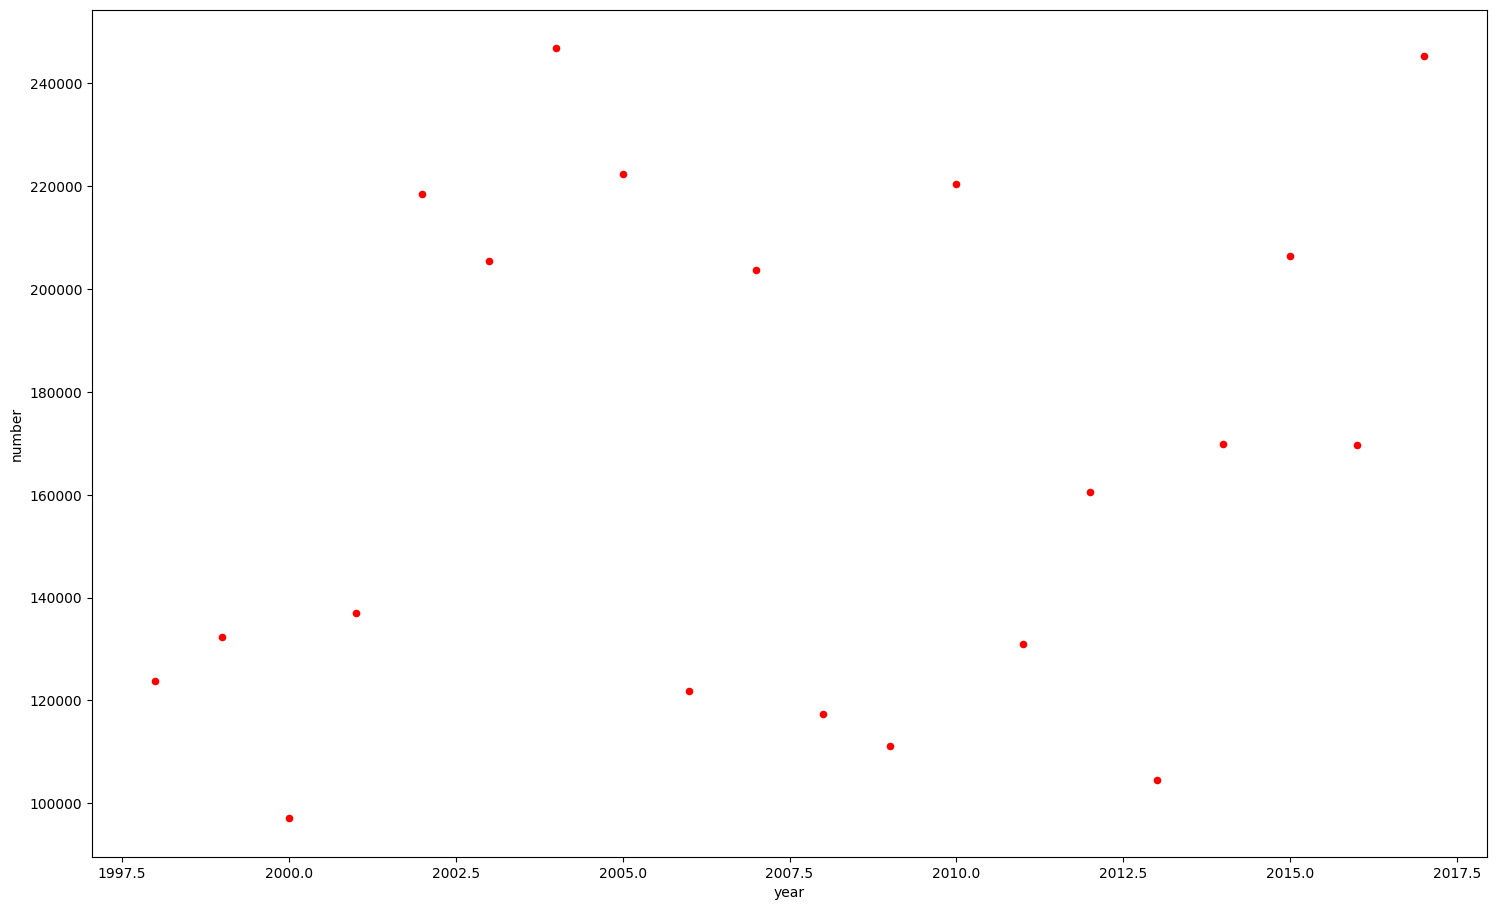

In [ ]:
Soma_incendio_ano.plot(kind='scatter', color = 'red' , x='year' , y= 'number', figsize=[18,11])


plotando com pandas

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

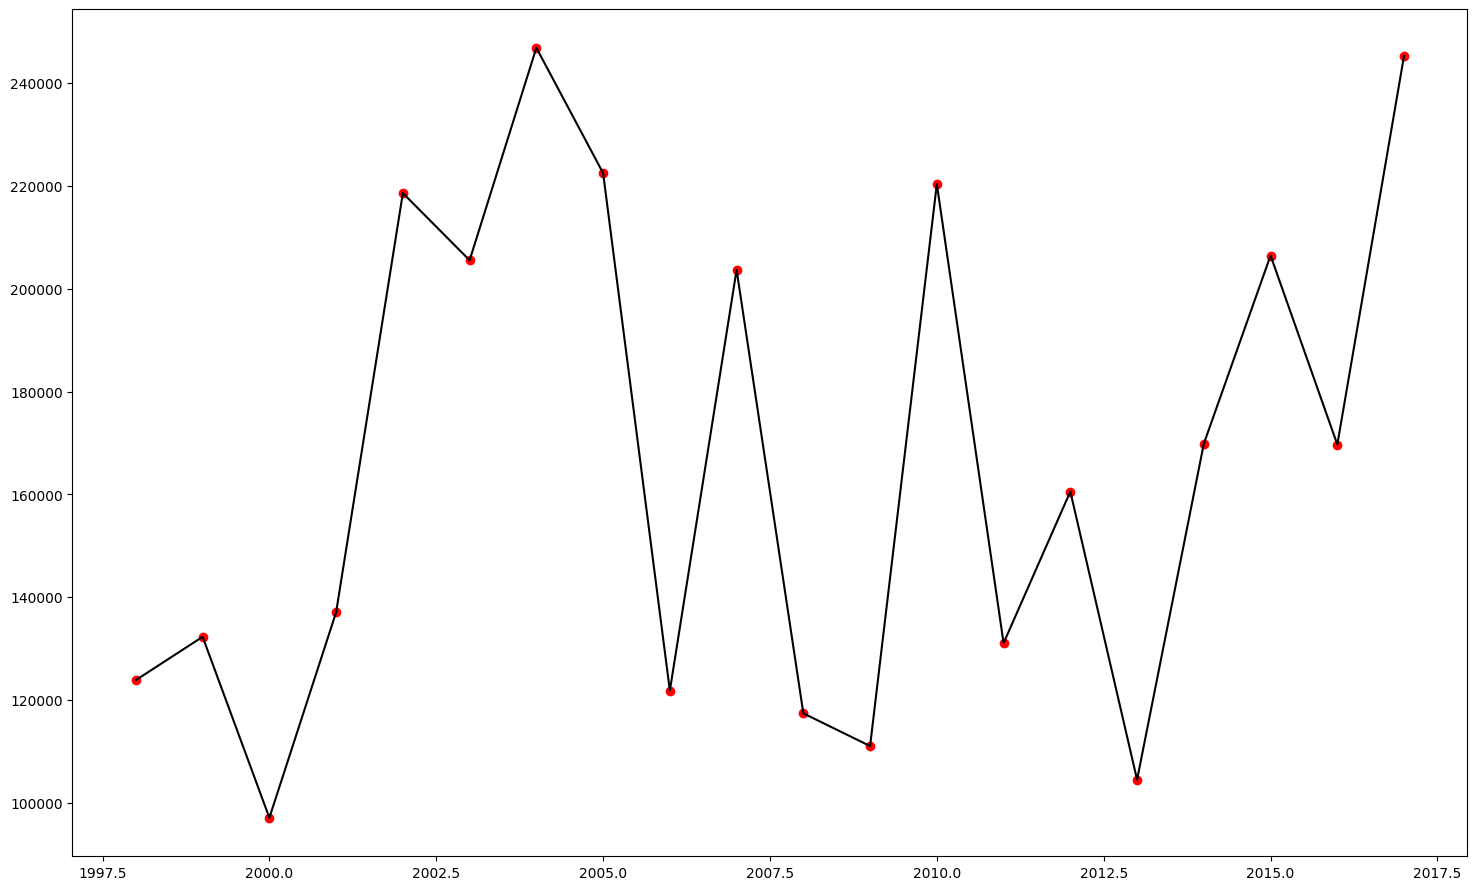

In [ ]:
x=Soma_incendio_ano['year']
y=Soma_incendio_ano['number']
plt.figure(figsize=(18,11))
plt.scatter(x,y ,  color = 'red')
plt.plot(x,y, color='black')

#Adicionando as legendas
plt.title

Podemos perceber que o matplot parece ser mais interessante para fazermos a plotagem

**Será que se eu ralizar uma regressão linear a visualização do crescimento do caso de incendios fica mais nitida???**

vou tentar

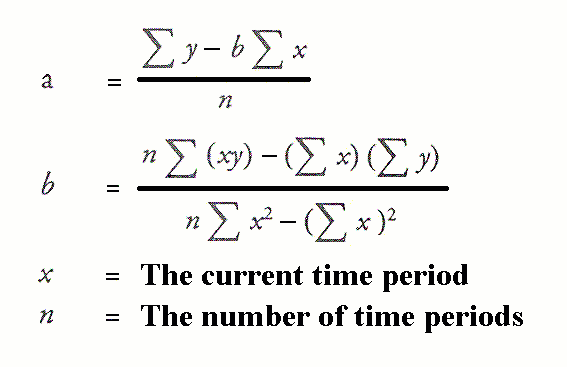

In [ ]:
import numpy as np

# Definindo minhas variaveis

x = Soma_incendio_ano['year']
y = Soma_incendio_ano['number']
n = np.size(X)

n = np.size(x)

# Calculando a regresão
a=(n*sum(x*y)-(sum(x)*sum(y)))/(n*sum(x**2)-(sum(x)**2))
b= np.mean(y) - a* np.mean(x)
K = a*x +b



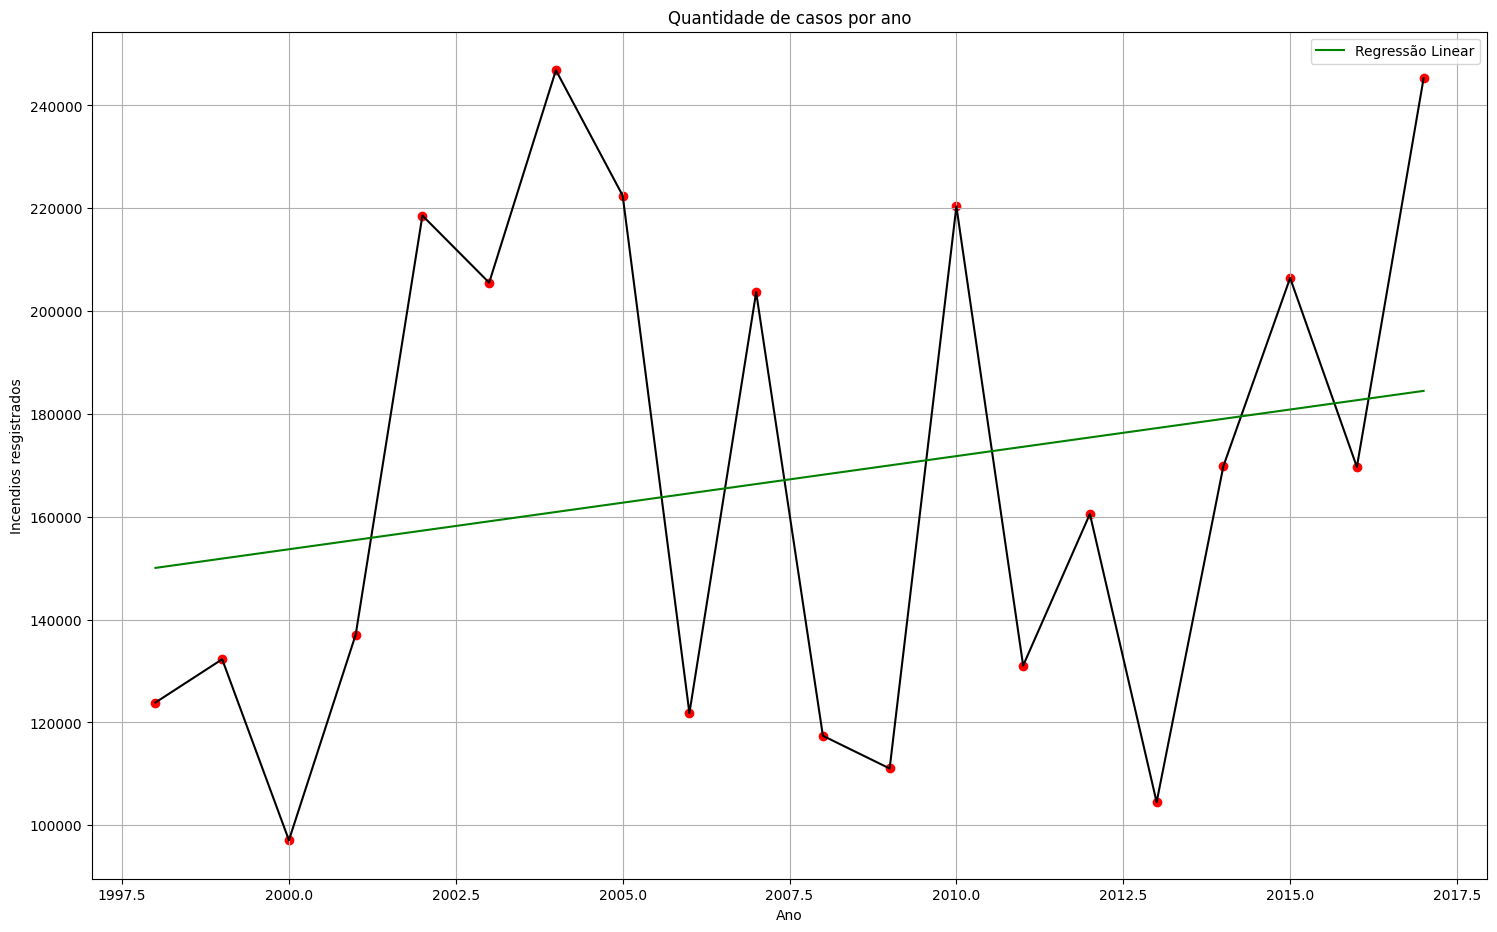

In [ ]:
x=Soma_incendio_ano['year']
y=Soma_incendio_ano['number']
plt.figure(figsize=(18,11))
plt.scatter(x,y ,  color = 'red')
plt.plot(x,y, color='black')

plt.plot(x, K, color='green', label='Regressão Linear')  # Adiciona a reta verde com o rótulo 'Regressão Linear'
plt.legend()
#Adicionando as legendas
plt.title('Quantidade de casos por ano')
plt.ylabel('Incendios resgistrados')
plt.xlabel('Ano')
plt.grid(True)

Esse é o resultado do nosso gráfico de 'Quantidade de cass por ano ' com nossa regressão linear.

Agora alem de podermos estimar os anos seguintes

## Vamos fazer uma breve analise dos anos que tiveram maior indices de queimadas

In [ ]:
Soma_incendio_ano=Soma_incendio_ano.sort_values(by='year')

,year,number
0,1998,123881.00
1,1999,132298.30
2,2000,97102.43
3,2001,137068.49
4,2002,218589.22
5,2003,205531.74
6,2004,246854.55
7,2005,222482.30
8,2006,121827.07
9,2007,203670.60


In [ ]:
data = {
    'year': list(range(1998, 2018)),
    'presidente': [
        'Fernando Henrique Cardoso', 'Fernando Henrique Cardoso', 'Fernando Henrique Cardoso',
        'Fernando Henrique Cardoso', 'Fernando Henrique Cardoso', 'Luiz Inácio Lula da Silva',
        'Luiz Inácio Lula da Silva', 'Luiz Inácio Lula da Silva', 'Luiz Inácio Lula da Silva',
        'Luiz Inácio Lula da Silva', 'Luiz Inácio Lula da Silva', 'Luiz Inácio Lula da Silva',
        'Luiz Inácio Lula da Silva', 'Dilma Rousseff', 'Dilma Rousseff', 'Dilma Rousseff',
        'Dilma Rousseff', 'Dilma Rousseff', 'Michel Temer', 'Michel Temer'
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)
df


,year,presidente
0,1998,Fernando Henrique Cardoso
1,1999,Fernando Henrique Cardoso
2,2000,Fernando Henrique Cardoso
3,2001,Fernando Henrique Cardoso
4,2002,Fernando Henrique Cardoso
5,2003,Luiz Inácio Lula da Silva
6,2004,Luiz Inácio Lula da Silva
7,2005,Luiz Inácio Lula da Silva
8,2006,Luiz Inácio Lula da Silva
9,2007,Luiz Inácio Lula da Silva


In [ ]:
Concat=pd.merge(df,Soma_incendio_ano , on='year')
concat=Concat.sort_values(by='number', ascending = False)
concat

,year,presidente,number
6,2004,Luiz Inácio Lula da Silva,246854.55
19,2017,Michel Temer,245304.73
7,2005,Luiz Inácio Lula da Silva,222482.30
12,2010,Luiz Inácio Lula da Silva,220362.94
4,2002,Fernando Henrique Cardoso,218589.22
17,2015,Dilma Rousseff,206454.88
5,2003,Luiz Inácio Lula da Silva,205531.74
9,2007,Luiz Inácio Lula da Silva,203670.60
16,2014,Dilma Rousseff,169853.82
18,2016,Michel Temer,169693.62


AQUI CONSEGUIMOS OBSERVAR OS GVERNOS PRESIDENCIAIS COM MAIS RECORRENCIAS DE QUEIMADAS

# Em qual mês do ano os incendios são mais recorrentes?

In [ ]:
import matplotlib.pyplot as plt

Soma_incendios_mes = amazon.groupby('month')['number'].sum().sort_values(ascending = False).reset_index()
Soma_incendios_mes

,month,number
0,Setembro,1001569.37
1,Agosto,735347.49
2,Outubro,626192.53
3,Novembro,310337.00
4,Julho,216767.54
5,Dezembro,151481.44
6,Junho,111147.47
7,Janeiro,52521.00
8,Maio,46077.00
9,Março,35110.00


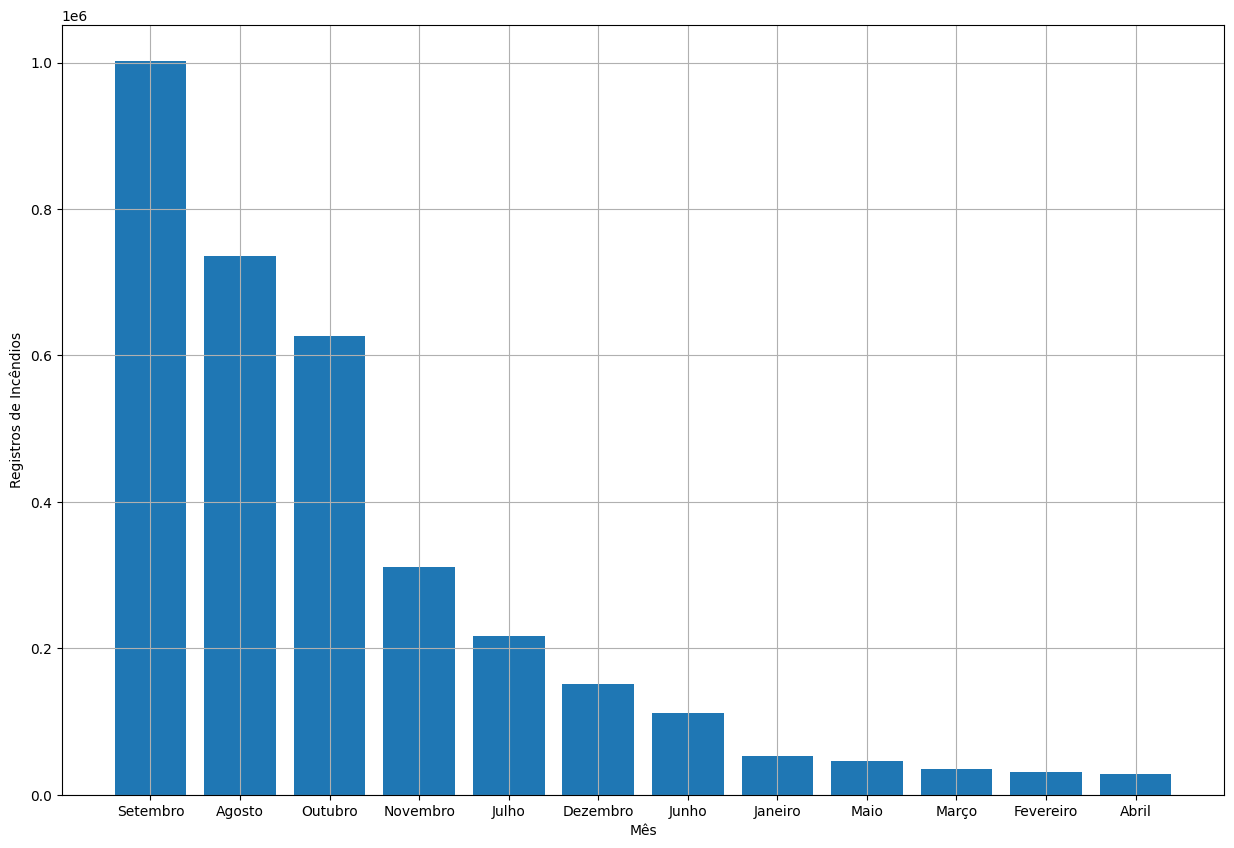

In [ ]:
import matplotlib.pyplot as plt

x = Soma_incendios_mes['month']
y = Soma_incendios_mes['number']

plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xlabel('Mês')
plt.ylabel('Registros de Incêndios')
plt.grid(True)



plt.show()


# TOP 10 estados mais afetados

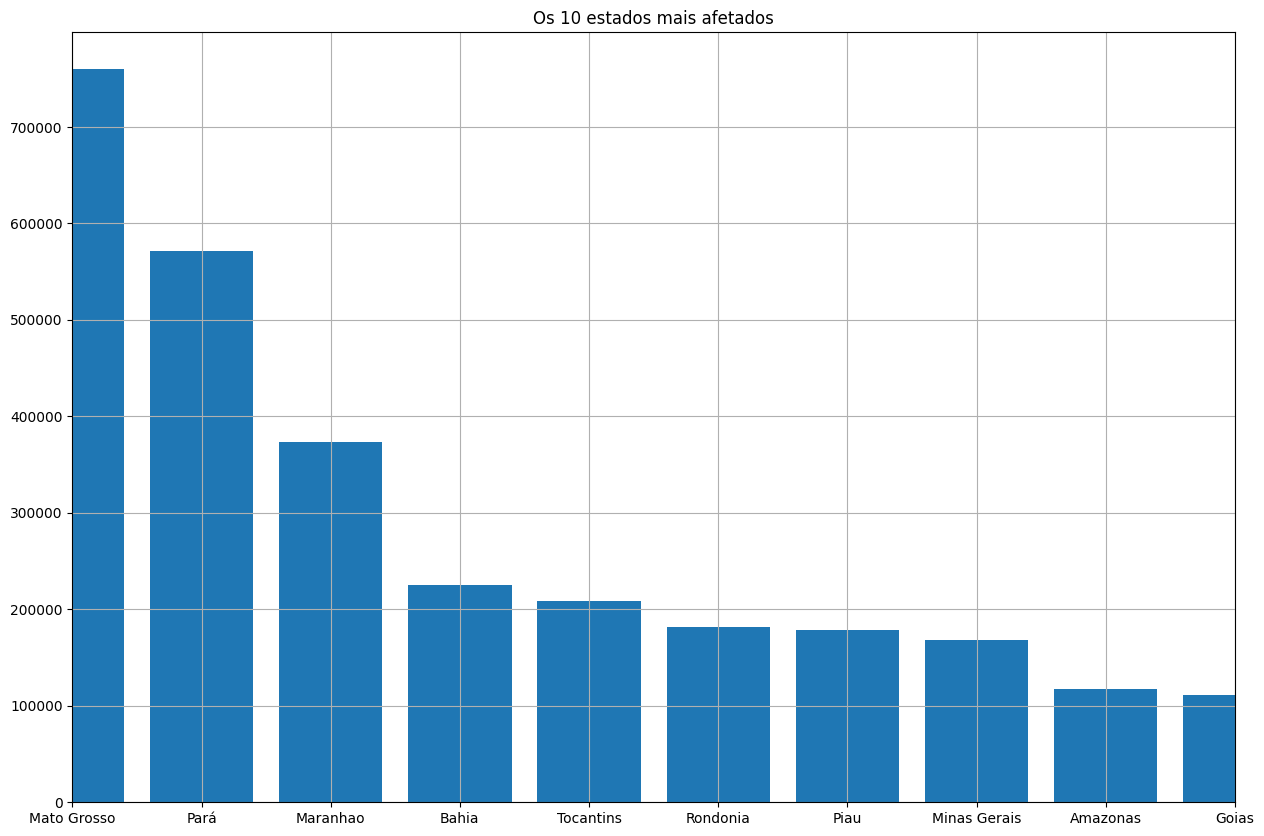

In [ ]:
Incendios_estados = amazon.groupby('state').sum(numeric_only = True).sort_values(by='number', ascending=False).reset_index()

x= Incendios_estados['state']
y=Incendios_estados['number']

plt.figure(figsize=(15,10))

plt.xlim( 0, 9)
plt.bar(x,y )
plt.grid(True)
plt.title('Os 10 estados mais afetados')
plt.show()